<a href="https://colab.research.google.com/github/AmanRKG/Data-Science-Intern-Assignment-Zeotap/blob/main/Data_Science_Intern_Assignment_%7C_Zeotap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets

In [ ]:
customers_df = pd.read_csv('/content/Customers (1).csv')
products_df = pd.read_csv('/content/Products (1).csv')
transactions_df = pd.read_csv('/content/Trans.csv')

In [ ]:
customers_df.head(3)

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07


In [ ]:
products_df.head(3)

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12


In [ ]:
transactions_df.head(3)

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68


# Convert date columns to datetime format

In [ ]:
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])

In [ ]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CustomerID    200 non-null    object        
 1   CustomerName  200 non-null    object        
 2   Region        200 non-null    object        
 3   SignupDate    200 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 6.4+ KB


# Merge datasets: transactions with customers and products

In [ ]:
transactions_customers = pd.merge(transactions_df, customers_df, on='CustomerID', how='left')
full_data = pd.merge(transactions_customers, products_df, on='ProductID', how='left')

In [ ]:
# Set visualization style

In [ ]:
sns.set_theme(style="whitegrid")

In [ ]:
# 1. Customer distribution by region

<ipython-input-13-c85cc291f149>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_counts.index, y=region_counts.values, palette="viridis")


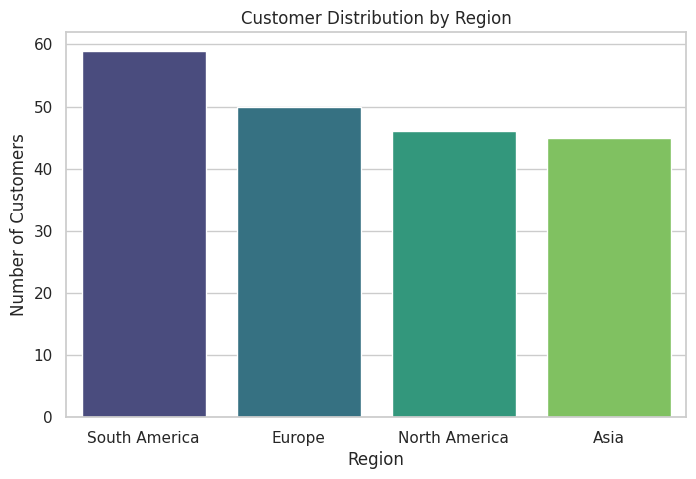

In [ ]:
region_counts = customers_df['Region'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=region_counts.index, y=region_counts.values, palette="viridis")
plt.title("Customer Distribution by Region")
plt.xlabel("Region")
plt.ylabel("Number of Customers")
plt.show()

In [ ]:
# 2. Top 10 products by sales (quantity sold)

<ipython-input-15-2e81b9a05793>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_products.index, x=top_products.values, palette="mako")


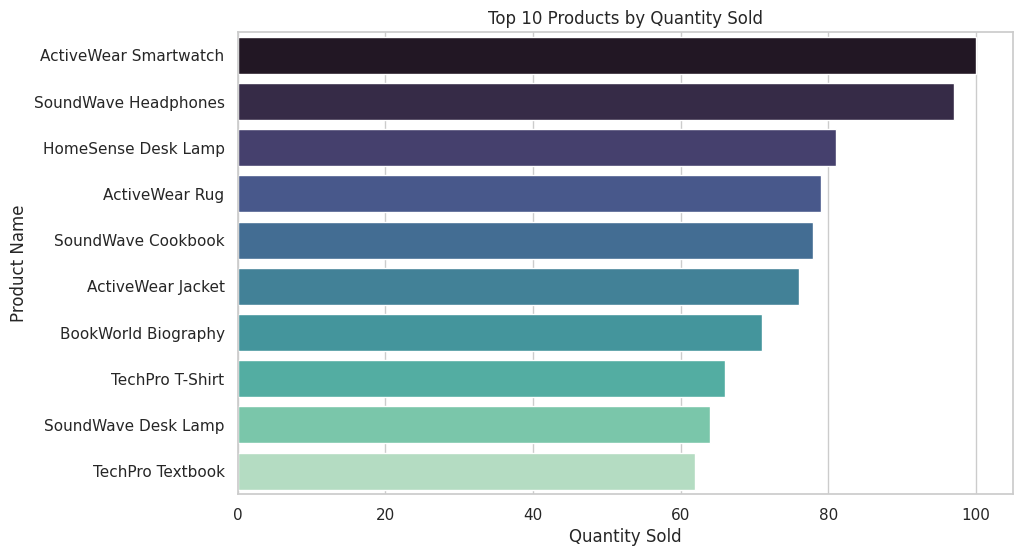

In [ ]:
top_products = full_data.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(y=top_products.index, x=top_products.values, palette="mako")
plt.title("Top 10 Products by Quantity Sold")
plt.xlabel("Quantity Sold")
plt.ylabel("Product Name")
plt.show()

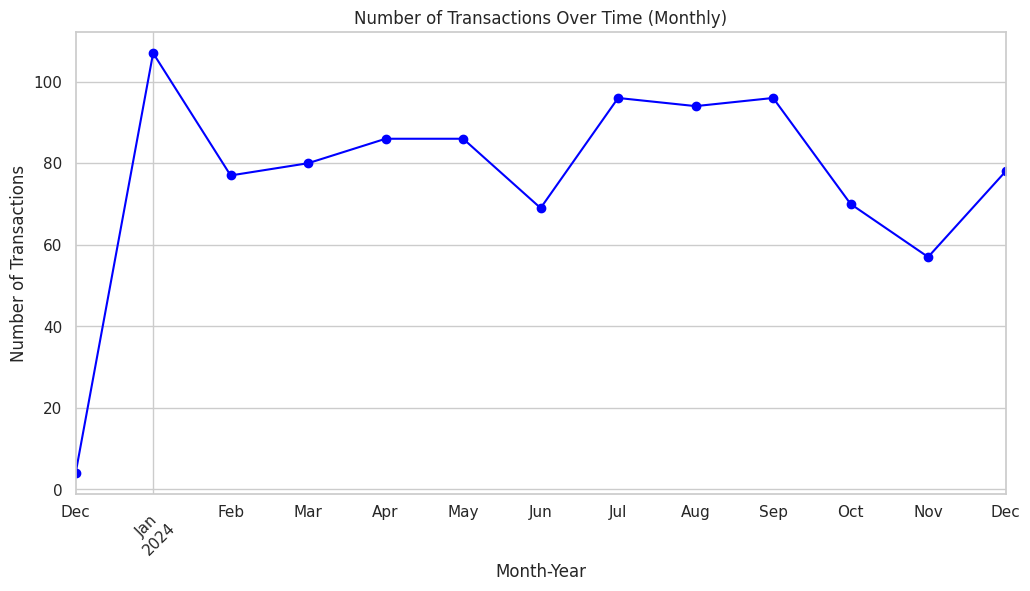

In [ ]:
# 3. Transactions over time
transactions_over_time = full_data['TransactionDate'].dt.to_period('M').value_counts().sort_index()
plt.figure(figsize=(12, 6))
transactions_over_time.plot(kind='line', marker='o', color='blue')
plt.title("Number of Transactions Over Time (Monthly)")
plt.xlabel("Month-Year")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# 4. Revenue by category

<ipython-input-19-9c91fcc3d3af>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=revenue_by_category.values, y=revenue_by_category.index, palette="rocket")


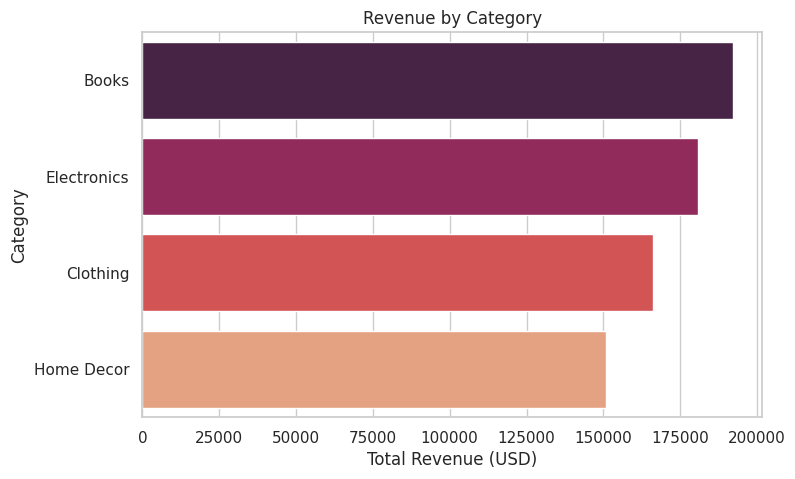

In [ ]:
revenue_by_category = full_data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(x=revenue_by_category.values, y=revenue_by_category.index, palette="rocket")
plt.title("Revenue by Category")
plt.xlabel("Total Revenue (USD)")
plt.ylabel("Category")
plt.show()

In [ ]:
# 5. Signup trend by year

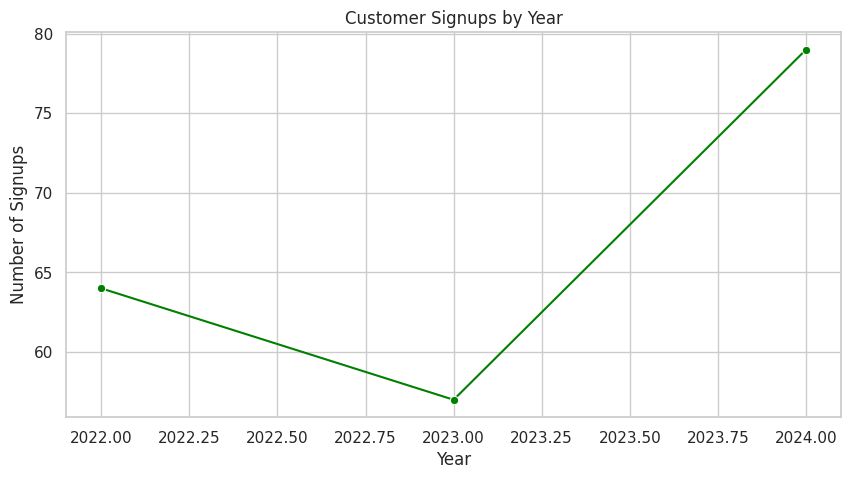

In [ ]:
signup_year = customers_df['SignupDate'].dt.year.value_counts().sort_index()
plt.figure(figsize=(10, 5))
sns.lineplot(x=signup_year.index, y=signup_year.values, marker='o', color='green')
plt.title("Customer Signups by Year")
plt.xlabel("Year")
plt.ylabel("Number of Signups")
plt.show()